In [11]:
import pandas as pd
import seaborn as sns

estacion = '5530E'
df = pd.read_csv(r'./data/'+estacion+'_clean.csv', sep=',')

In [2]:
df.columns

Index(['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today',
       'rain_tomorrow', 'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_'],
      dtype='object')

In [3]:
X = df[['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today',
        'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_']]
y = df['rain_tomorrow']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. StandardScaler()

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
scaler.inverse_transform(X_train)

array([[ 9.8,  0. ,  0.9, ..., 15. , 17. , 16. ],
       [13.1,  0. ,  3.4, ..., 16. , 18. , 16. ],
       [13. ,  0. ,  2.9, ..., 14. , 16. , 16. ],
       ...,
       [28.5,  0. , 18.4, ..., 16. , 12. , 16. ],
       [23.4,  0. , 10.4, ..., 14. , 17. , 15. ],
       [22.8,  0. , 13.7, ..., 15. , 15. , 16. ]])

### 3. Implement Logistic Regression in Scikit-Learn and predict

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

"""
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
"""

'\nsns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);\nprint(accuracy_score(y_test,y_pred))\nprint(precision_score(y_test, y_pred))\nprint(recall_score(y_test, y_pred))\nprint(f1_score(y_test, y_pred))\nprint(roc_auc_score(y_test, y_pred))\n'

In [8]:
from sklearn.model_selection import KFold, cross_val_score
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.83043478 0.86521739 0.86521739 0.83913043 0.82608696 0.82173913
 0.8173913  0.86086957 0.86956522 0.83913043]
Logistic Regression: 0.843478 (0.018952)


### 4. Evaluate model

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#### 1. Confusion Matrix

c_mat:
 [[740  40]
 [121  86]]
% c_mat:
 [[0.94871795 0.19323671]
 [0.15512821 0.41545894]]


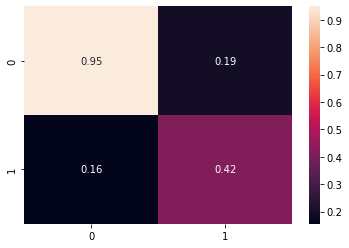

In [12]:
c_mat = confusion_matrix(y_test,y_pred)
print("c_mat:\n",c_mat)
c_mat.sum(axis=1)
print("% c_mat:\n",c_mat/c_mat.sum(axis=1))
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);

In [13]:
accuracy_score(y_test,y_pred) # De todas las clasificaciones del predictor, cuántas son correctas

0.8368794326241135

#### 2. Precision

In [14]:
precision_score(y_test, y_pred)

0.6825396825396826

In [15]:
c_mat

array([[740,  40],
       [121,  86]])

In [16]:
86/(86+40)

0.6825396825396826

#### 3. Recall

In [17]:
recall_score(y_test, y_pred)

0.41545893719806765

In [18]:
print(c_mat) #TP/TP+FN De todos los 1s reales, cuántos he clasificado correctamente


[[740  40]
 [121  86]]


In [19]:
86/(86+121)

0.41545893719806765

### 4. F1 Score

In [20]:
f1_score(y_test, y_pred)

0.5165165165165165

In [21]:
c_mat #2*precision*recall/precision+recall

array([[740,  40],
       [121,  86]])

In [22]:
2*precision_score(y_test, y_pred)*recall_score(y_test, y_pred)/(precision_score(y_test, y_pred)+recall_score(y_test, y_pred))

0.5165165165165165

#### 5. ROC curve

In [23]:
roc_auc_score(y_test, y_pred)

0.6820884429580082

### Validation

In [24]:
from sklearn.model_selection import KFold, cross_val_score
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.83043478 0.86521739 0.86521739 0.83913043 0.82608696 0.82173913
 0.8173913  0.86086957 0.86956522 0.83913043]
Logistic Regression: 0.843478 (0.018952)
